In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

# データセットの生成

In [2]:
# forgeデータセットの生成
X, y = mglearn.datasets.make_forge()

X.shape: (26, 2)


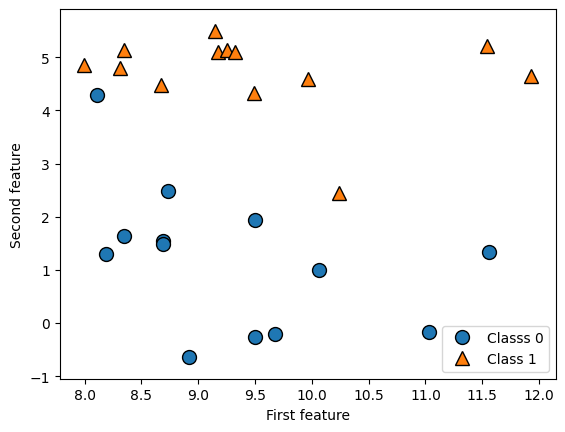

In [3]:
# データセットをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Classs 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

In [4]:
# waveデータセットの生成
X, y = mglearn.datasets.make_wave(n_samples=40)

Text(0, 0.5, 'Target')

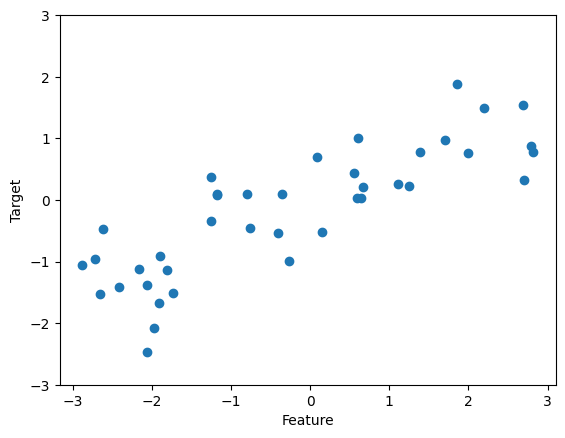

In [5]:
# データセットをプロット
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [6]:
# cancerデータセットの生成
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key(): \n{}".format(cancer.keys()))

cancer.key(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
# データセットの確認
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Feature names:\n{}".format(cancer.feature_names))

Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
# boston_housingデータセットの生成
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [9]:
# boston_housingデータセット生成関数の定義
# https://stackoverflow.com/questions/57645829/why-am-i-getting-a-syntaxwarning-invalid-escape-sequence-s-warning
# https://wayama.io/article/library/sklearn/datasets/
# https://bbengfort.github.io/2016/04/bunch-data-management/
# https://www.kaggle.com/code/alexandrecazals/sklearn-boston-housing-dataset
def load_boston():
    import numpy as np
    import pandas as pd
    from sklearn.utils import Bunch
    
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    target_names = ['MEDV']
    feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
    DESCR = """
        .. _boston_dataset:

        Boston house prices dataset
        ---------------------------
        
        **Data Set Characteristics:**  
        
            :Number of Instances: 506 
        
            :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
        
            :Attribute Information (in order):
                - CRIM     per capita crime rate by town
                - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
                - INDUS    proportion of non-retail business acres per town
                - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
                - NOX      nitric oxides concentration (parts per 10 million)
                - RM       average number of rooms per dwelling
                - AGE      proportion of owner-occupied units built prior to 1940
                - DIS      weighted distances to five Boston employment centres
                - RAD      index of accessibility to radial highways
                - TAX      full-value property-tax rate per $10,000
                - PTRATIO  pupil-teacher ratio by town
                - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
                - LSTAT    % lower status of the population
                - MEDV     Median value of owner-occupied homes in $1000's
        
            :Missing Attribute Values: None
        
            :Creator: Harrison, D. and Rubinfeld, D.L.
        
        This is a copy of UCI ML housing dataset.
        https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
        
        
        This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
        
        The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
        prices and the demand for clean air', J. Environ. Economics & Management,
        vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
        ...', Wiley, 1980.   N.B. Various transformations are used in the table on
        pages 244-261 of the latter.
        
        The Boston house-price data has been used in many machine learning papers that address regression
        problems.   
             
        .. topic:: References
        
           - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
           - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
    """
    return Bunch(data=data,
                 target=target,
                 frame=None,
                 target_names=target_names,
                 feature_names=feature_names,
                 DESCR=DESCR)

In [10]:
boston = load_boston()
# print(boston.keys())
# print(boston.data)
# print(boston.target)
# print(boston.frame)
# print(boston.target_names)
# print(boston.feature_names)
# print(boston.DESCR)
print(type(boston))
print("Data shape: {}".format(boston.data.shape))
print("Target shape: {}".format(boston.target.shape))

df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['MEDV'] = pd.DataFrame(data=boston.target)
df.shape
df.head()

<class 'sklearn.utils._bunch.Bunch'>
Data shape: (506, 13)
Target shape: (506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
# print(california.keys())
# print(california.data)
# print(california.target)
# print(california.frame)
# print(california.target_names)
# print(california.feature_names)
# print(california.DESCR)
print(type(california))
print("Data shape: {}".format(california.data.shape))
print("Target shape: {}".format(california.target.shape))

df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['MedianHouseValue'] = pd.DataFrame(data=california.target)
df.shape
df.head()

<class 'sklearn.utils._bunch.Bunch'>
Data shape: (20640, 8)
Target shape: (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
# 特徴量の交互作用も含めたデータの読み込み
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


# カーネル法を用いたサポートベクターマシン
- 線形サポートベクターマシンを拡張したもの
- クラス分類（SVC）にも回帰（SVR）にも利用できる

Text(0, 0.5, 'Feature 1')

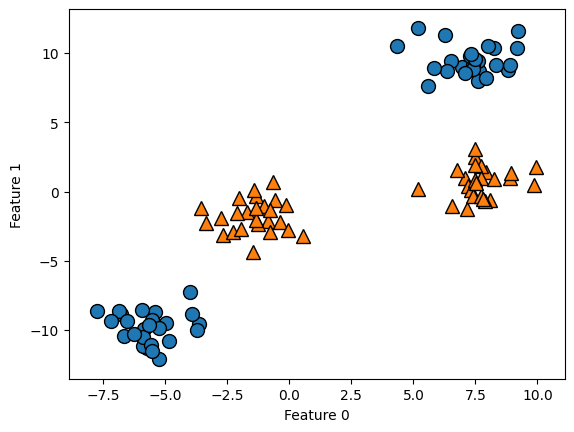

In [13]:
# 低次元の特徴量
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

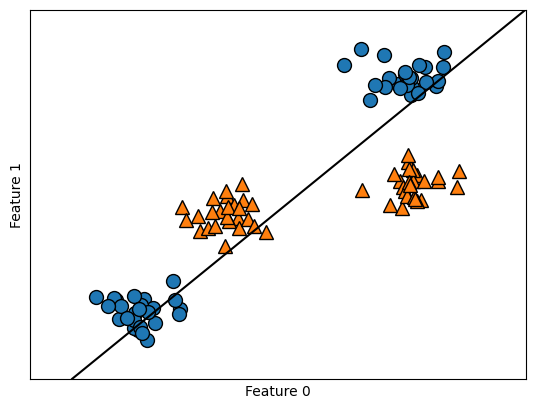

In [14]:
# 線形SVMでの分類
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(dual='auto').fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/tmp/ipykernel_4709/1727025656.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
/tmp/ipykernel_4709/1727025656.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


Text(0.5, 0, 'feature1 ** 2')

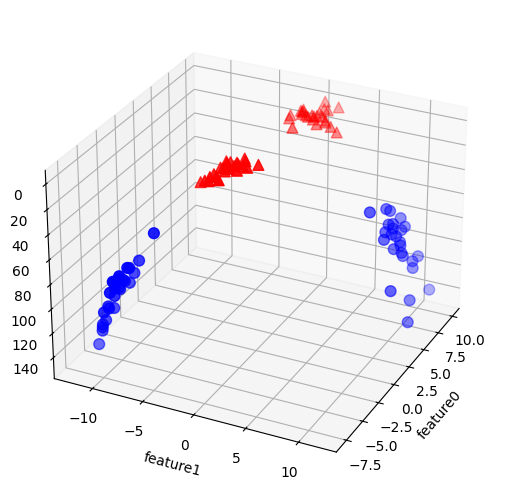

In [15]:
# 低次元での線形モデルは制約が強いため、特徴量を追加して柔軟にする

# 2番目の特徴量の2乗を追加
X_new = np.hstack([X, X[:, 1:] ** 2])

# from mpl_toolkits.mplot3d import Axes3D, axes3d # axes3dは不要
from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure()
# 3Dで可視化
ax = Axes3D(figure, elev=-152, azim=-26)
# https://qiita.com/horita_toshiki_r0/items/314a1f83ffba372fd139
figure.add_axes(ax) # matplotlibの仕様変更
# y == 0の点をプロットしてからy == 1の点をプロット
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/usr/local/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/tmp/ipykernel_4709/826429988.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
/tmp/ipykernel_4709/826429988.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


NameError: name 'b' is not defined

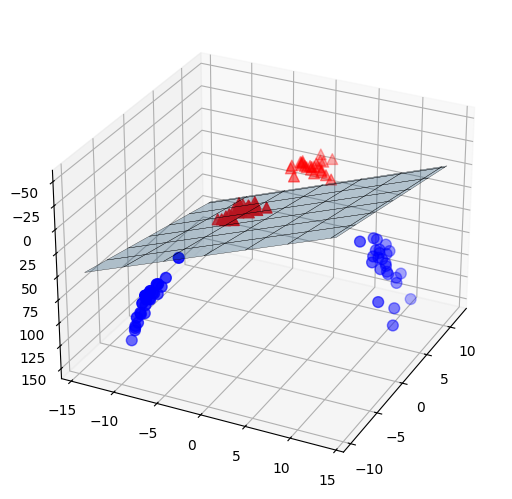

In [16]:
# 拡張されたデータセットに対して線形モデルを適用する
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 線形決定境界を描画
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
# https://qiita.com/horita_toshiki_r0/items/314a1f83ffba372fd139
figure.add_axes(ax) # matplotlibの仕様変更
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3, linewidth=0.2, edgecolors='black')
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)
b
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'Feature 1')

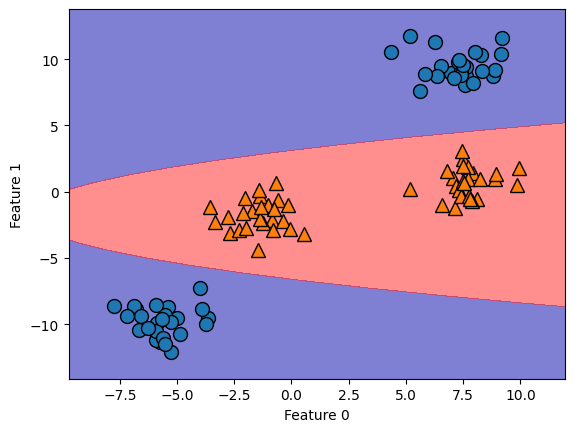

In [17]:
# 決定境界の2次元描画
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## カーネルトリック
- 拡張された特徴表現上でのデータポイント間の距離を、実際にデータポイントの拡張を計算せずに、直接計算する方法
- よく用いられる高次元空間へのマップ方法は2つある
    - 多項式（Polynomial）カーネル：もとの特徴量の特定の次数までのすべての多項式（例えば${x_1}^2*{x_2}^5$など）を計算する
    - 放射規定関数（RBF: Radial Basis Function）カーネル：すべての次数のすべての多項式を考慮するが、次数が高くなるにつれて重要性が小さくなる
- データポイント間の距離は以下で定義されるガウシアンカーネルで測られる
    - $k_{rbf}(x_{1}, x_{2}) = exp(-γ||x_{1} - x_{2}||)$
    - データポイント間の距離が大きくなるほど$k_{rbf}$は小さくなる

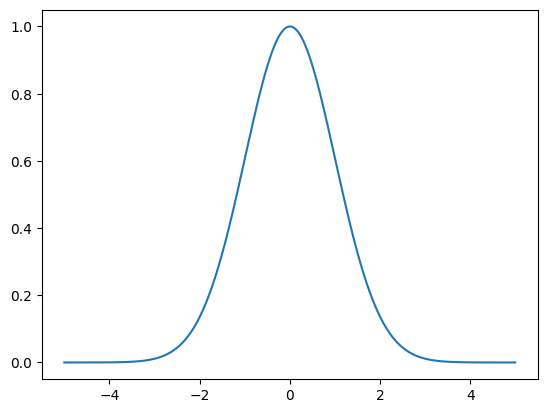

In [18]:
# ユークリッド距離とRBFカーネルの関係
gamma = 0.5
x = np.arange(-5.0, 5.0, 0.01) # ユークリッド距離
y = np.exp(-gamma * x**2)      # RBFカーネル

plt.plot(x, y)

X.shape: (26, 2)
y.shape: (26,)


Text(0, 0.5, 'Feature 1')

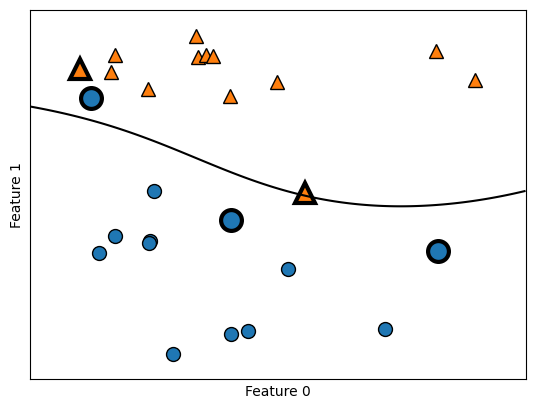

In [19]:
# forgeデータセットに対してSVMを訓練して描画する
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# サポートベクタをプロットする
sv = svm.support_vectors_
# サポートベクタのクラスラベルはdual_coef_の正負によって与えられる
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

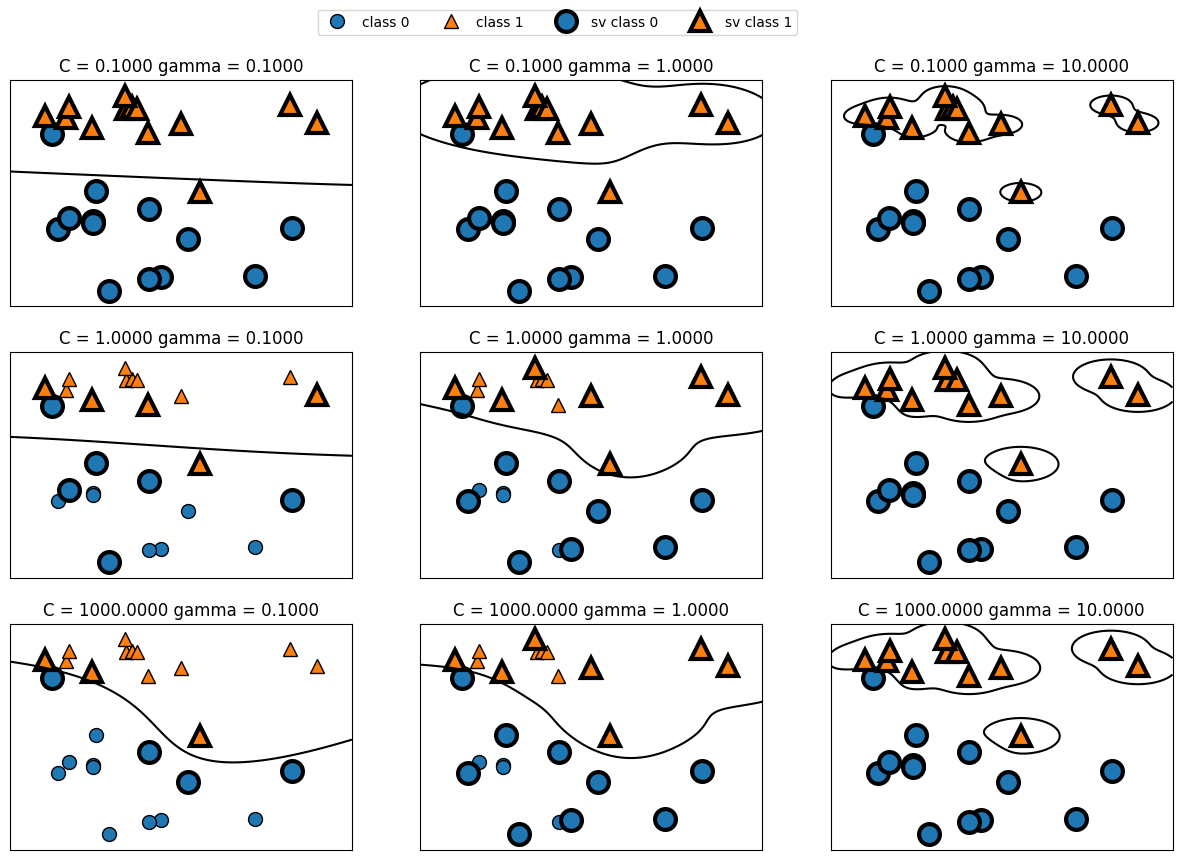

In [20]:
# SVMパラメータ（C:正則化パラメータ, gamma: ガウシアンカーネルの直径）の調整
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

- gammaが小さい（決定境界に近いデータポイントの数が少ない）とモデルの複雑さが小さくなり、決定境界が単純になる
- Cが小さい（正則化が強い=係数の大きさに対するペナルティが大きい）とモデルへの制限が大きくなり、個々のデータポイントの与える影響が小さくなる

In [21]:
# cancerデータセットへのRBFカーネル法を用いたSVMの適用
# パラメータはC=1, gamma=1/n_features

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# svc = SVC() # C=1.0, gamma='scale' ->  1 / (n_features * X.var())
n_features = X_train.shape[1]
C=1.0
# gamma = 1 / (n_features * X_train.var()) # default
gamma = 1 / n_features # in the book
svc = SVC(C=C, gamma=gamma)
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


- 訓練セットに対しての精度が100%で、テストセットに対しての精度が低い ⇒ 過剰適合

Text(0, 0.5, 'Feature magnitude')

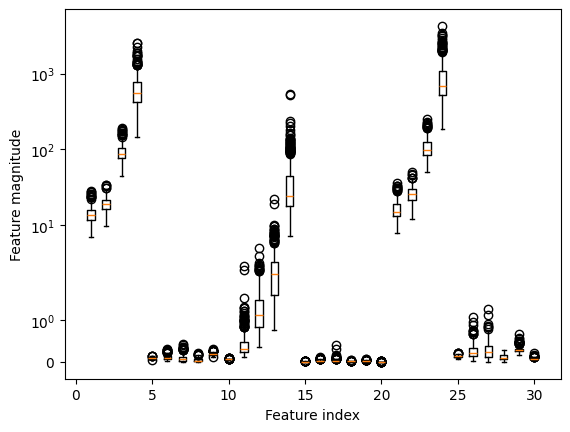

In [22]:
# 特徴量のスケールを描画する
# https://matplotlib.org/3.3.4/api/api_changes.html
# plt.boxplot(X_train, manage_xticks=False) # manage_xticks -> manage_ticks
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog") # 対数スケール
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [23]:
# 訓練セットのすべての特徴量のスケールを合わせる
print("Number of datapoints (rows): {}".format(X_train.shape[0]))
print("Number of features (columns): {}".format(X_train.shape[1]))
print("")

# 訓練セットの特徴量ごとに最小値を計算
min_on_training = X_train.min(axis=0)
print("min_on_training: {}\n{}".format(min_on_training.shape, min_on_training))
print("")
# 訓練セットの特徴量ごとにレンジ（最大値 - 最小値）を計算
range_on_training = (X_train - min_on_training).max(axis=0)
print("range_on_training: {}\n{}".format(range_on_training.shape, range_on_training))
print("")

# 最小値を引いてレンジで割る
# 個々の特徴量はmin=0、max=1となる
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis=0)))

Number of datapoints (rows): 426
Number of features (columns): 30

min_on_training: (30,)
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]

range_on_training: (30,)
[2.11290e+01 2.41000e+01 1.44710e+02 2.35750e+03 9.20700e-02 2.92020e-01
 4.26800e-01 2.01200e-01 1.98000e-01 4.74800e-02 2.76150e+00 4.52220e+00
 2.12230e+01 5.34972e+02 2.16170e-02 1.04148e-01 3.96000e-01 5.27900e-02
 5.35780e-02 2.89452e-02 2.81100e+01 3.75200e+01 2.00790e+02 4.06880e+03
 1.51430e-01 1.03071e+00 1.25200e+00 2.90300e-01 5.07300e-01 1.52460e-01]

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [24]:
# テストセットに対しても全く同じ変換を行う
# 訓練セットの最小値とレンジを用いる（詳細は4章を参照）
X_test_scaled = (X_test - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_test_scaled.min(axis=0)))
print("Maximum for each feature\n{}".format(X_test_scaled.max(axis=0)))

Minimum for each feature
[ 0.03540158  0.04190871  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00105015 -0.00057494
  0.00067851 -0.0007963   0.05148726  0.01434497  0.          0.
  0.04195752  0.01113138  0.03678406  0.01252665  0.03366702  0.01400904
  0.08531995  0.01833687  0.          0.          0.00749064  0.02367834]
Maximum for each feature
[0.76809125 1.22697095 0.75813696 0.64750795 1.20310633 1.11643038
 0.99906279 0.90606362 0.93232323 0.94903117 0.45573058 0.72623944
 0.48593507 0.31641282 1.36082713 1.2784499  0.36313131 0.77476795
 1.32643996 0.72672498 0.82106012 0.87553305 0.77887345 0.67803775
 0.78603975 0.87843331 0.93450479 1.0024113  0.76384782 0.58743277]


In [25]:
# スケール変換した訓練セットとテストセットを使ってSVCの評価を行う
n_features = X_train.shape[1]
C=1.0
gamma = 1 / n_features

svc = SVC(C=C, gamma=gamma)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


- 訓練セットに対する精度と、テストセットに対する精度が同じく低い ⇒ 適合不足

In [26]:
# C, gammaの調整
n_features = X_train.shape[1]
C=1000
gamma = 1 / n_features

svc = SVC(C=C, gamma=gamma)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


## カーネル法を用いたサポートベクタマシンの利点、欠点、パラメータ
- 利点
    - さまざまなデータセットに対して機能する強力なモデル
    - データにわずかな特徴量しかない（データの次元が低い）場合にも複雑な決定境界を生成することができる
    - 低次元のデータでも高次元のデータでも（特徴量が少なくても多くても）うまく機能する
    - 特徴量が同じスケールになる場合（カメラ画像などの似た測定器の測定結果）は、SVMを試してみる価値がある
- 欠点
    - サンプルの個数が大きくなるとうまく機能しない
        - 10,000サンプルぐらいまではうまく機能するが、100,000サンプルぐらいになると実行時間やメモリ使用量の面で運用が難しくなる
    - 注意深くデータの前処理とパラメータ調整を行う必要がある
    - 検証が難しい
        - ある予測がされた理由を理解することが難しく、モデルを専門家以外に説明するのが大変
- パラメータ
    - 正則化パラメータ：C (Cost)
    - カーネルの選択：線形カーネル、多項式カーネル、RBFカーネル、シグモイドカーネル、など
        - カーネル固有のパラメータ：RBFカーネルでは、ガウシアンカーネルの幅の逆数を表すgammaのみ
    - RBFカーネルのパラメータCとgammaはどちらもモデルの複雑さを制御する
        - 大きくするとより複雑なモデルになる
        - これらの調整は同時に行う必要がある